In [2]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

np.random.seed(0)
%matplotlib inline

# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

print("Minimum")
print(np.min(X, axis=0))

print("Maximum")
print(np.max(X, axis=0))

print("Mean")
print(np.mean(X, axis=0))

print("Variance")
print(np.var(X, axis=0))

Minimum
[  1.93500000e+02   1.52500000e+02   2.14250000e+02   1.52500000e+02
   1.00000000e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   8.75890000e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   9.90490000e-01  -9.99900000e+02]
Maximum
[  2.53000000e+02   2.49000000e+02   2.52500000e+02   2.52500000e+02
   3.10480000e+04   1.36300000e+04   9.23800000e+03   1.25170000e+02
   1.91670000e+01   1.32300000e+01   6.67610000e+01   7.39020000e+01
   9.75040000e+02   7.97200000e+02]
Mean
[  2.41601104e+02   2.27376571e+02   2.41554150e+02   2.32826768e+02
   3.08992337e+03   9.28259020e+02   1.38093830e+02   3.24857933e+00
   6.49865290e+00   2.09713912e+00   4.21766041e+00   2.69171845e+00
   1.02715905e+01   5.78148050e+00]
Variance
[  8.34991711e+01   9.26255931e+01   3.52863398e+01   9.76257317e+01
   1.56515138e+07   3.08176182e+06   4.43951746e+05   8.21948502e+00
   6.40504819e+00   4.36344047e+00   4.08637188e+00   2.19877847e+00
   4.04646245e+02   3.40652055e+03

In [6]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:5000], Ytr[:5000] # subsample for efficiency (you can go higher)
XtS, params = ml.rescale(Xt) # Normalize the features
XvS, _ = ml.rescale(Xva, params) # Normalize the features

print("Minimum")
print(np.min(XtS, axis=0))

print("Maximum")
print(np.max(XtS, axis=0))

print("Mean")
print(np.mean(XtS, axis=0))

print("Variance")
print(np.var(XtS, axis=0))

Minimum
[ -4.42216573  -3.8379954   -4.59918459  -2.91081643  -0.77951138
  -0.5162351   -0.20010711  -1.13819869  -2.10058928  -0.98959137
  -2.10536922  -1.94981435  -0.37599778 -16.3042146 ]
Maximum
[  1.24467764   1.81425059   1.80668179   1.95449774   7.30095389
   7.3734214   13.76719683   7.35307847   4.7265899    5.43214474
   7.41739991   6.11287977  37.41876648  12.78474766]
Mean
[  1.06831266e-14   8.26561042e-16  -3.05723447e-14  -1.16594401e-14
  -2.48689958e-17   2.87869728e-16  -1.27531319e-16   1.56654689e-15
  -1.87889704e-15  -2.18238483e-15   1.36182177e-15   3.20241611e-15
   1.23601129e-16   6.18449736e-17]
Variance
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [21]:
learner = ml.linearC.linearClassify()
learner.train(XtS, Yt, reg=0.0, initStep=0.5, stopTol=1e-6, stopIter=100)
learner.auc(XtS, Yt) # train AUC

0.65063525395362487

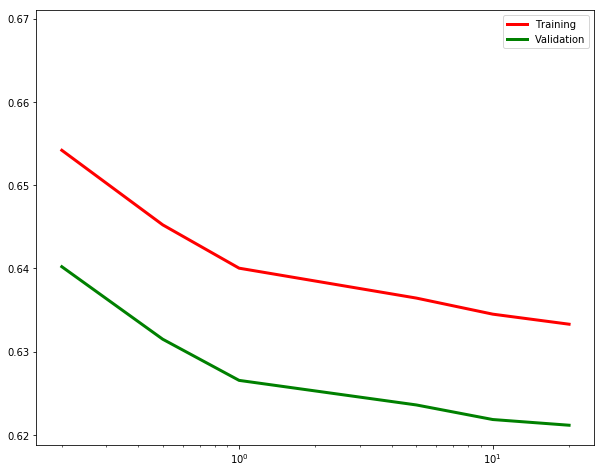

In [22]:
K=[0.0,0.2,0.5,1.0,5.0,10,20];
errTrain = [0,0,0,0,0,0,0]
errValidate = [0,0,0,0,0,0,0]
for i,k in enumerate(K):
    learner = ml.linearC.linearClassify()
    learner.train(XtS, Yt, reg=k, initStep=0.01, stopTol=1e-6, stopIter=100)
    errTrain[i] = learner.auc(XtS, Yt) # train AUC
    errValidate[i] = learner.auc(XvS, Yva) # validation AUC
    
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.semilogx(K, errTrain, 'r-', lw=3, label='Training')
ax.semilogx(K, errValidate, 'g-', lw=3, label='Validation')
ax.legend()
plt.show()

In [55]:
XtSP = ml.transforms.fpoly(XtS, 2, False)
XtSP,params = ml.transforms.rescale(XtSP)

XvSP = ml.transforms.fpoly(XvS, 2, False)
XvSP,_ = ml.transforms.rescale(XvSP, params)

print(XtSP.shape)
print(XvSP.shape)

(5000, 119)
(40000, 119)


In [62]:
print("There are 119 features because of combinations by repitition where the formula is ((14 + 2 − 1)!/2!(14 − 1)!)+14 which equals 119.")

There are 119 features because of combinations by repitition where the formula is ((14 + 2 − 1)!/2!(14 − 1)!)+14 which equals 119.


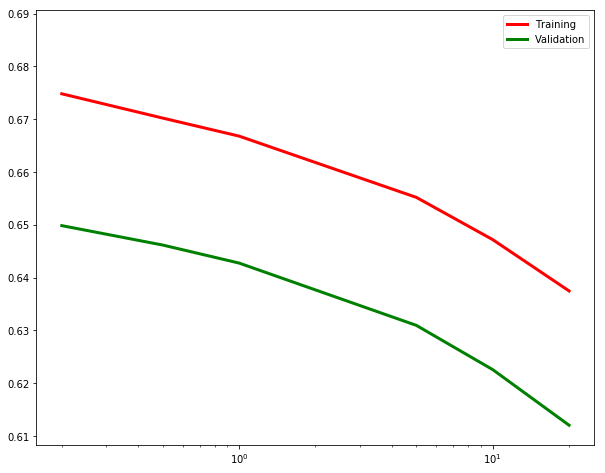

In [24]:
K=[0.0,0.2,0.5,1.0,5.0,10,20];
errTrain = [0,0,0,0,0,0,0]
errValidate = [0,0,0,0,0,0,0]
for i,k in enumerate(K):
    learner = ml.linearC.linearClassify()
    learner.train(XtSP, Yt, reg=k, initStep=0.01, stopTol=1e-6, stopIter=100)
    errTrain[i] = learner.auc(XtSP, Yt) # train AUC
    errValidate[i] = learner.auc(XvSP, Yva) # validation AUC
    
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.semilogx(K, errTrain, 'r-', lw=3, label='Training')
ax.semilogx(K, errValidate, 'g-', lw=3, label='Validation')
ax.legend()
plt.show()

In [25]:
learner = ml.knn.knnClassify()
learner.train(XtS, Yt, K=1, alpha=0.0)
learner.auc(XtS, Yt) # train AUC

0.99626593380618478

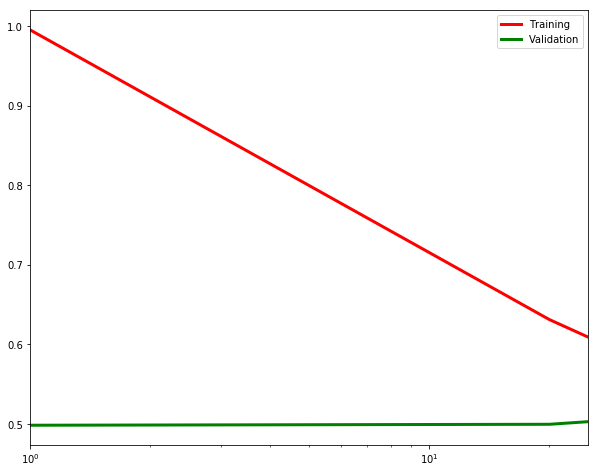

In [27]:
K=[1,20,25];
errTrain = [0,0,0]
errValidate = [0,0,0]
for i,k in enumerate(K):
    learner = ml.knn.knnClassify()
    learner.train(XtS, Yt, K=k, alpha=0.0)
    errTrain[i] = learner.auc(XtS, Yt) # train AUC
    errValidate[i] = learner.auc(XvS, Yva) # validation AUC
    
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.semilogx(K, errTrain, 'r-', lw=3, label='Training')
ax.semilogx(K, errValidate, 'g-', lw=3, label='Validation')
ax.legend()
ax.set_xlim(0, 25)
plt.show()

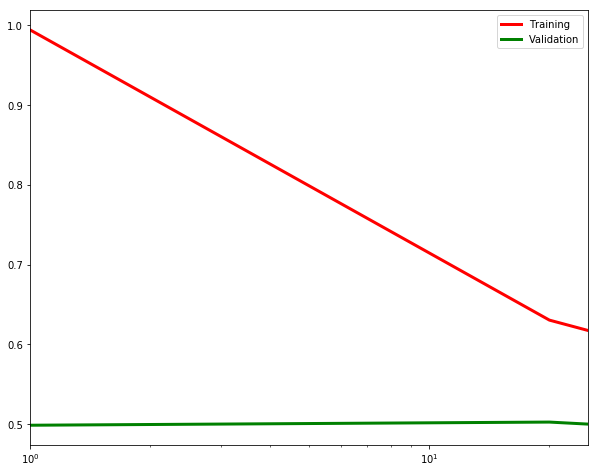

In [28]:
K=[1,20,25];
errTrain = [0,0,0]
errValidate = [0,0,0]
for i,k in enumerate(K):
    learner = ml.knn.knnClassify()
    learner.train(Xt, Yt, K=k, alpha=0.0)
    errTrain[i] = learner.auc(Xt, Yt) # train AUC
    errValidate[i] = learner.auc(Xva, Yva) # validation AUC
    
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.semilogx(K, errTrain, 'r-', lw=3, label='Training')
ax.semilogx(K, errValidate, 'g-', lw=3, label='Validation')
ax.legend()
ax.set_xlim(0, 25)
plt.show()

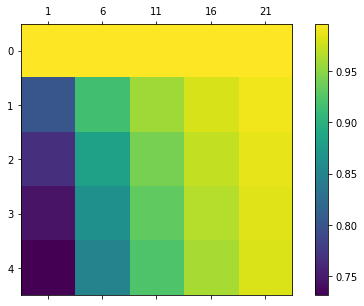

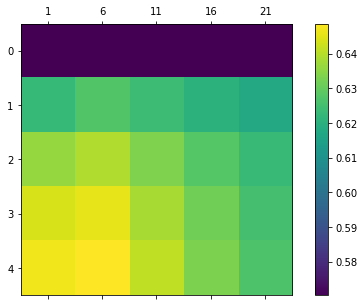

In [41]:
K = range(1,25,5) # Or something else
A = range(0,5,1) # Or something else
tr_auc = np.zeros((len(K),len(A)))
va_auc = np.zeros((len(K),len(A)))
for i,k in enumerate(K):
    for j,a in enumerate(A):
        learner = ml.knn.knnClassify()
        learner.train(XtS, Yt, K=k, alpha=a)
        tr_auc[i][j] = learner.auc(XtS, Yt) # train learner using k and a
        va_auc[i][j] = learner.auc(XvS, Yva)
# Now plot it
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+K)
ax.set_yticklabels(['']+A)
plt.show()

f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+K)
ax.set_yticklabels(['']+A)
plt.show()

In [51]:
print("I would recommend K=11, a=2");

I would recommend K=11, a=2


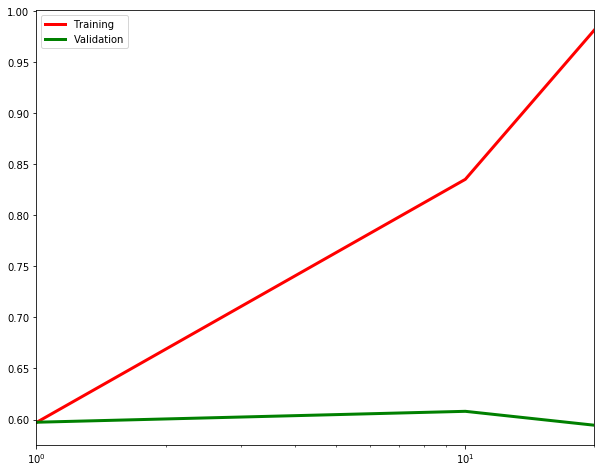

In [38]:
K=[1,10,20];
errTrain = [0,0,0]
errValidate = [0,0,0]
for i,k in enumerate(K):
    learner = ml.dtree.treeClassify(Xt, Yt, minParent=2, minLeaf=1, maxDepth=k)
    errTrain[i] = learner.auc(Xt, Yt) # train AUC
    errValidate[i] = learner.auc(Xva, Yva) # validation AUC
    
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.semilogx(K, errTrain, 'r-', lw=3, label='Training')
ax.semilogx(K, errValidate, 'g-', lw=3, label='Validation')
ax.legend()
ax.set_xlim(0, 20)
plt.show()

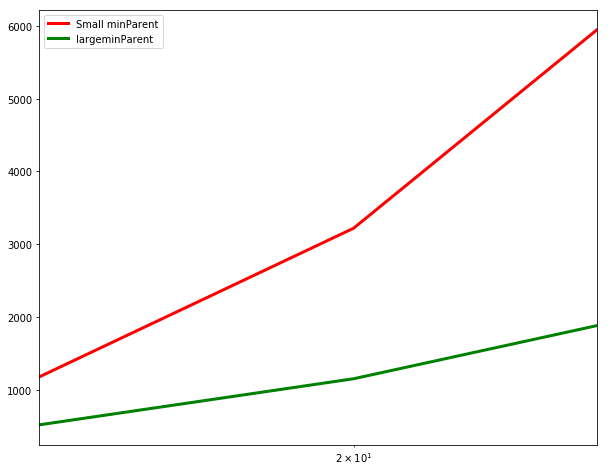

In [30]:
K=[15,20,25];
smallTrain = [0,0,0]
largeValidate = [0,0,0]
for i,k in enumerate(K):
    learner = ml.dtree.treeClassify(Xt, Yt, minParent=1, minLeaf=1, maxDepth=k)
    smallTrain[i] = learner.sz # small learner
    learner = ml.dtree.treeClassify(Xt, Yt, minParent=10, minLeaf=1, maxDepth=k)
    largeValidate[i] = learner.sz # larger learner
    
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.semilogx(K, smallTrain, 'r-', lw=3, label='Small minParent')
ax.semilogx(K, largeValidate, 'g-', lw=3, label='largeminParent')
ax.legend()
ax.set_xlim(0, 25)
plt.show()

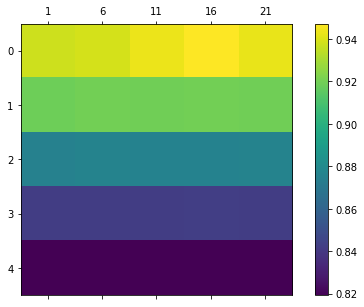

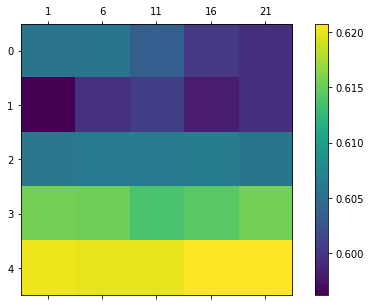

In [35]:
K = range(1,25,5) # Or something else
A = range(0,5,1) # Or something else
tr_auc = np.zeros((len(K),len(A)))
va_auc = np.zeros((len(K),len(A)))
for i,k in enumerate(K):
    for j,a in enumerate(A):
        learner = ml.dtree.treeClassify(Xt, Yt, minParent=a, minLeaf=k, maxDepth=15)
        tr_auc[i][j] = learner.auc(Xt, Yt) # train learner using k and a
        va_auc[i][j] = learner.auc(Xva, Yva)
# Now plot it
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+K)
ax.set_yticklabels(['']+A)
plt.show()

f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+K)
ax.set_yticklabels(['']+A)
plt.show()

In [52]:
print("I would recommend a K=11 and a=2")

I would recommend a K=11 and a=2


it 1 : Jsur = 0.475307860586, J01 = 0.3672
it 2 : Jsur = 0.459080728939, J01 = 0.3424
it 4 : Jsur = 0.451167359315, J01 = 0.3384
it 8 : Jsur = 0.448150937382, J01 = 0.3384
it 16 : Jsur = 0.446455460153, J01 = 0.337
it 32 : Jsur = 0.445324544758, J01 = 0.336
it 64 : Jsur = 0.444904638075, J01 = 0.3358
it 128 : Jsur = 0.444780638767, J01 = 0.3358
it 256 : Jsur = 0.444736301104, J01 = 0.3358
it 1 : Jsur = 0.45836041116, J01 = 0.3358
it 2 : Jsur = 0.451973869758, J01 = 0.3358
it 4 : Jsur = 0.447884665533, J01 = 0.3358
it 8 : Jsur = 0.445930167933, J01 = 0.3358
it 16 : Jsur = 0.445068688618, J01 = 0.3358
it 32 : Jsur = 0.44479340765, J01 = 0.3358
it 64 : Jsur = 0.444690878992, J01 = 0.3358
it 128 : Jsur = 0.444639252758, J01 = 0.3358
it 256 : Jsur = 0.444611249878, J01 = 0.3358
it 1 : Jsur = 0.458377047103, J01 = 0.3358
it 2 : Jsur = 0.451994865335, J01 = 0.3358
it 4 : Jsur = 0.44818733989, J01 = 0.3358
it 8 : Jsur = 0.446727377108, J01 = 0.3358
it 16 : Jsur = 0.446217365116, J01 = 0.3358
i

it 8 : Jsur = 0.446727375805, J01 = 0.3358
it 16 : Jsur = 0.446217359309, J01 = 0.3358
it 32 : Jsur = 0.446098360479, J01 = 0.3358
it 64 : Jsur = 0.446079985367, J01 = 0.3358
it 128 : Jsur = 0.446077269003, J01 = 0.3358
it 1 : Jsur = 0.458377050319, J01 = 0.3358
it 2 : Jsur = 0.451994865537, J01 = 0.3358
it 4 : Jsur = 0.448187339947, J01 = 0.3358
it 8 : Jsur = 0.446727377132, J01 = 0.3358
it 16 : Jsur = 0.446217365126, J01 = 0.3358
it 32 : Jsur = 0.446098371866, J01 = 0.3358
it 64 : Jsur = 0.44608000265, J01 = 0.3358
it 128 : Jsur = 0.446077293813, J01 = 0.3358
it 1 : Jsur = 0.458377051342, J01 = 0.3358
it 2 : Jsur = 0.451994865575, J01 = 0.3358
it 4 : Jsur = 0.448187339965, J01 = 0.3358
it 8 : Jsur = 0.446727377142, J01 = 0.3358
it 16 : Jsur = 0.446217365132, J01 = 0.3358
it 32 : Jsur = 0.44609837187, J01 = 0.3358
it 64 : Jsur = 0.446080002652, J01 = 0.3358
it 128 : Jsur = 0.446077293815, J01 = 0.3358


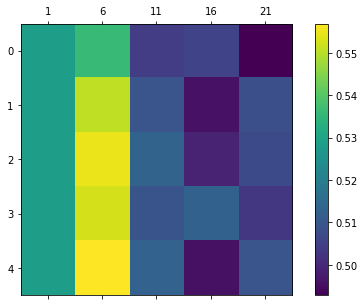

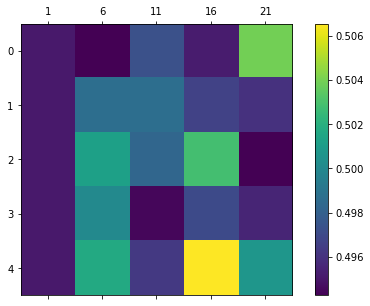

In [49]:
K = range(1,25,5) # Or something else
A = range(0,5,1) # Or something else
tr_auc = np.zeros((len(K),len(A)))
va_auc = np.zeros((len(K),len(A)))
for i,k in enumerate(K):
    for j,a in enumerate(A):
        arr = np.full(a,k)
        nn = ml.nnet.nnetClassify()
        nn.init_weights([XtS.shape[1]] + [d for d in arr] + [2], 'random', XtS, Yt) # as many layers nodes you want
        nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
        tr_auc[i][j] = nn.auc(XtS, Yt) # train learner using k and a
        va_auc[i][j] = nn.auc(XvS, Yva)
# Now plot it
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+K)
ax.set_yticklabels(['']+A)
plt.show()

f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+K)
ax.set_yticklabels(['']+A)
plt.show()

In [50]:
print("I would recommend a size of 4 and 16")

I would recommend a size of 4 and 16


In [59]:
sig = lambda z: 1. / (1 + np.exp(-z))
dsig = lambda z: (1. / (1 + np.exp(-z)))*(1-(1. / (1 + np.exp(-z))))
nn.setActivation('custom', sig, dsig)

arr = np.full(4,16)
nn = ml.nnet.nnetClassify()
nn.init_weights([XtS.shape[1]] + [d for d in arr] + [2], 'random', XtS, Yt) # as many layers nodes you want
nn.setActivation('custom', sig, dsig)
nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
print('custom')
print(nn.auc(XtS, Yt))
print(nn.auc(XvS, Yva))

it 1 : Jsur = 0.462415773775, J01 = 0.3358
it 2 : Jsur = 0.454317997529, J01 = 0.3358
it 4 : Jsur = 0.449030319951, J01 = 0.3358
it 8 : Jsur = 0.446989008193, J01 = 0.3358
it 16 : Jsur = 0.446292069874, J01 = 0.3358
it 32 : Jsur = 0.446111101248, J01 = 0.3358
it 64 : Jsur = 0.446081782661, J01 = 0.3358
it 128 : Jsur = 0.446077565242, J01 = 0.3358
custom
0.516227343135
0.496299855351


In [60]:
nn = ml.nnet.nnetClassify()
nn.init_weights([XtS.shape[1]] + [d for d in arr] + [2], 'random', XtS, Yt) # as many layers nodes you want
nn.setActivation('logistic', sig, dsig)
nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
print('logistic')
print(nn.auc(XtS, Yt))
print(nn.auc(XvS, Yva))

it 1 : Jsur = 0.462419032427, J01 = 0.3358
it 2 : Jsur = 0.454319555248, J01 = 0.3358
it 4 : Jsur = 0.449030853049, J01 = 0.3358
it 8 : Jsur = 0.44698915216, J01 = 0.3358
it 16 : Jsur = 0.446292109529, J01 = 0.3358
it 32 : Jsur = 0.446111105549, J01 = 0.3358
it 64 : Jsur = 0.446081780157, J01 = 0.3358
it 128 : Jsur = 0.446077561721, J01 = 0.3358
logistic
0.515317185797
0.496302763576


In [63]:
nn = ml.nnet.nnetClassify()
nn.init_weights([XtS.shape[1]] + [d for d in arr] + [2], 'random', XtS, Yt) # as many layers nodes you want
nn.setActivation('htangent', sig, dsig)
nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
print('htangent')
print(nn.auc(XtS, Yt))
print(nn.auc(XvS, Yva))

it 1 : Jsur = 0.458377049676, J01 = 0.3358
it 2 : Jsur = 0.451994865447, J01 = 0.3358
it 4 : Jsur = 0.448187339956, J01 = 0.3358
it 8 : Jsur = 0.446727377135, J01 = 0.3358
it 16 : Jsur = 0.44621736513, J01 = 0.3358
it 32 : Jsur = 0.446098371868, J01 = 0.3358
it 64 : Jsur = 0.446080002652, J01 = 0.3358
it 128 : Jsur = 0.446077293815, J01 = 0.3358
htangent
0.489378688043
0.502119311236


In [66]:
print("The custom function has a similar outcome as logistic and htangent")

The custom function has a similar outcome as logistic and htangent


In [69]:
print("I decided to use a treeClassifier because it seems to be more accurate when doing the homework assignment.")

I decided to use a treeClassifier because it seems to be more accurate when doing the homework assignment.


In [71]:
Xte = np.genfromtxt('data/X_test.txt', delimiter=None)

learner = ml.dtree.treeClassify(X, Y, minParent=1, minLeaf=1, maxDepth=5)

Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
np.savetxt('Y_submit.txt', Yte, '%d, %.2f', header='ID,Prob1', comments='', delimiter=',')

In [72]:
print("Statement of Collaboration")
print("Stephanie Chan, Hubert Cheng, Nathan Wu")
print("We discussed how the code works and concepts that are needed to do the homework.")

Statement of Collaboration
Stephanie Chan, Hubert Cheng, Nathan Wu
We discussed how the code works and concepts that are needed to do the homework.
